#*Logistic Regression Lab*

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Plots
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix #Confusion matrix
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import math


#Load Data
data = pd.read_csv('student_score.csv',index_col=0)


##**Problem Statement**

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams.


*   You have historical data from previous applicants that you can use as a training set for logistic regression.
*   For each training example, you have the applicant’s scores on two exams and the admissions decision.
*  Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams. 






## Inspecting the data

Inspecting the top 5 examples of the data

In [4]:
data.head()

,Exam1,Exam2,Status
ID,,,
1,34.623660,78.024693,0
2,30.286711,43.894998,0
3,35.847409,72.902198,0
4,60.182599,86.308552,1
5,79.032736,75.344376,1


Visualising the data

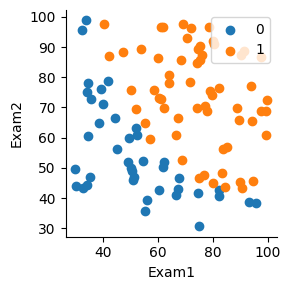

In [5]:
statPlt = sb.FacetGrid(data, hue="Status").map(plt.scatter, "Exam1", "Exam2")
plt.legend(loc='upper right');

Assign features to matrix X and target to vector y



In [6]:
features = data[['Exam1','Exam2']]
target = data.Status

in the following cell try inspecting the first 5 examples in both X and y

In [7]:
data.head()

,Exam1,Exam2,Status
ID,,,
1,34.623660,78.024693,0
2,30.286711,43.894998,0
3,35.847409,72.902198,0
4,60.182599,86.308552,1
5,79.032736,75.344376,1


Splitting the data into training and testing sets

In [8]:
features = np.array(features)
target =np.array(target)
X_train,X_test,y_train,y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

In [9]:
def normalize_features(X):
    X_norm = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    return X_norm

# normalize the input features
X_train = normalize_features(X_train)
X_test = normalize_features(X_test)

# X_train = X_train.reshape(-1,1)
# X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

Examine the shape of X_train

In [10]:
X_train=np.array(X_train)
X_train.shape

(80, 2)

## **Implementing Sigmoid Function**

As you hopefully remember from the session, the equation of logistic regresion is as follows:

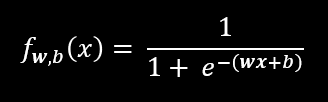

in the following cell try to implemet it by yourself

In [11]:
def sigmoid(z):
   #z = wx+b
   #g_z is the sigmoid of z
   g_z=1/(1+np.exp(-z))
   return g_z


try testing a few values by calling sigmoid(x) in the cell below.
 

*   large positive values of x, the sigmoid should be close to 1
*   large negative values, the sigmoid should be close to 0
*   sigmoid(0) should give you exactly 0.5

In [12]:
num = -3
print ("sigmoid({}) = ".format(num) + str(sigmoid(num)))

sigmoid(-3) = 0.04742587317756678


Your code should also work with vectors and matrices. For a matrix, your function should perform the sigmoid function on every element

In [13]:
print ("sigmoid([ -1, 0, 1, 2]) = " + str(sigmoid(np.array([-1, 0, 1, 2]))))

sigmoid([ -1, 0, 1, 2]) = [0.26894142 0.5        0.73105858 0.88079708]


**Expected Output:** `sigmoid([ -1, 0, 1, 2]) = [0.26894142 0.5        0.73105858 0.88079708]`

## **Cost function for logistic regression**

Recall that the cost function of logistic regression is

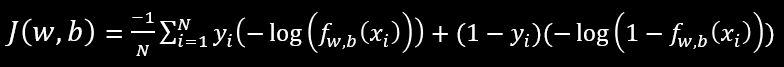

Implement the cost function in the following cell

In [14]:
def compute_cost(X, y, w, b):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : scalar Values of bias parameter of the model
    Returns:
      cost: (scalar)         cost 
    """

    m, n = X.shape
    f=sigmoid(np.dot(X,w)+b)
    cost_pt1=np.dot(y.T,(np.log(f)))
    cost_pt2=np.dot((1-y).T,(np.log(1-f)))
    cost=(np.sum((cost_pt1+cost_pt2)))/-m
    

    return cost

testing the cost implementation using w=0 and b=0

In [15]:
m, n = X_train.shape

#initialize w and b with zeros
zero_w = np.zeros(n)
zero_b = 0.0
cost = compute_cost(X_train, y_train, zero_w, zero_b)
print("cost = {}".format(cost))

cost = 0.6931471805599452


**Expected Output:** 

```
cost = 0.6931471805599456
```


## **Gradient descent for logistic regression**

In the following cell implement a function that computes the gradients of the cost with respect to weights and bias

In [16]:
def compute_gradient(X,y,w,b):
  m, n = X.shape
  #initialize dj_dw and dj_db a zeros
  dj_dw = np.zeros(w.shape)
  dj_db = 0.
  f=sigmoid(np.dot(X,w))
  dj_dw=np.sum(np.dot(X.T,(f-y)))/m
  dj_db=np.sum((f-y))/m


  return dj_dw, dj_db

We intalize the values of w and b randomly them optimize them using gradient descent as follows:
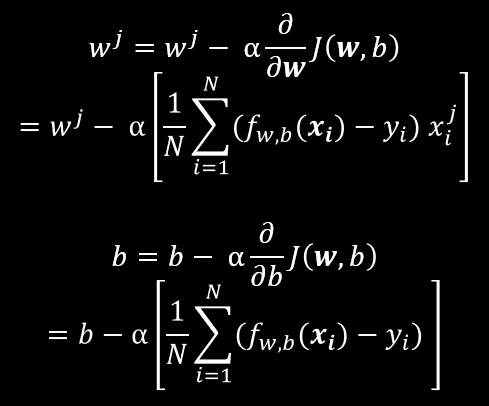

In the following cell try to implement gradient descent for logistic regression

In [17]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    # number of training examples
    m = len(X)
    J_history = []

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient(X, y, w_in, b_in)   

        # Update Parameters using w, b, alpha and gradient
        w_in =    w_in-(alpha*dj_dw)
        b_in =    b_in-(alpha*dj_db)

        # Save cost J at each iteration
        if i < 100000:
            cost = cost_function(X, y, w_in, b_in)
            J_history.append(cost)
            if i % 10 == 0 and i < 100000 - 10:
                print("cost = {}".format(cost))
        

    return w_in, b_in, J_history


Run the following 2 cells without modifications



In [18]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8.0


# Some gradient descent settings
iterations = 10000
alpha = 0.005


w, b, J_history = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)


cost = 4.798166560968349
cost = 4.779395220326394
cost = 4.760696740368213
cost = 4.742071119398995
cost = 4.723518351993436
cost = 4.705038428997177
cost = 4.686631337529304
cost = 4.668297060985912
cost = 4.650035579044717
cost = 4.631846867670758
cost = 4.613730899123131
cost = 4.595687641962802
cost = 4.577717061061465
cost = 4.559819117611473
cost = 4.5419937691367895
cost = 4.524240969505018
cost = 4.506560668940448
cost = 4.488952814038141
cost = 4.471417347779053
cost = 4.453954209546165
cost = 4.436563335141626
cost = 4.419244656804905
cost = 4.401998103231926
cost = 4.38482359959519
cost = 4.367721067564866
cost = 4.350690425330837
cost = 4.333731587625705
cost = 4.316844465748703
cost = 4.300028967590558
cost = 4.28328499765923
cost = 4.266612457106562
cost = 4.250011243755788
cost = 4.2334812521299074
cost = 4.217022373480903
cost = 4.200634495819775
cost = 4.184317503947384
cost = 4.1680712794860835
cost = 4.151895700912121
cost = 4.135790643588793
cost = 4.119755979800325

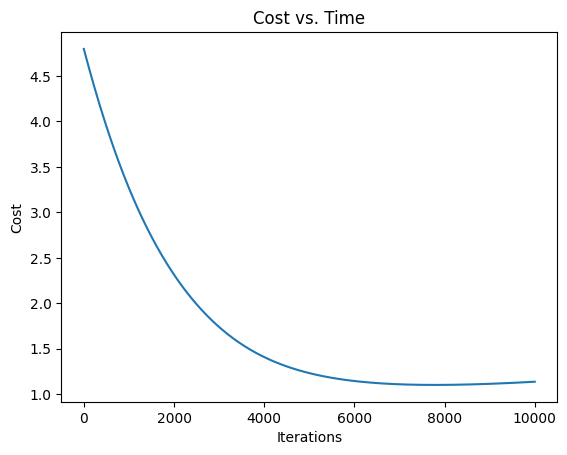

In [19]:
# Visualize the cost against time
plt.plot(range(iterations), np.squeeze(J_history))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Time')
plt.show()

In the following cell write a function that predicts the labels of X_train using the values of w and b to calculate the training accuracy

In [20]:
def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
    X : (ndarray Shape (m, n))
    w : (array_like Shape (n,))      Parameters of the model
    b : (scalar, float)              Parameter of the model

    Returns:
    p: (ndarray (m,1))
        The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    #write your code here

    # Calculate the prediction from the model
    f_wb = sigmoid(np.dot(X,w)+b)
    p = f_wb >=0.5
        
    return p

In [21]:
y_pred = predict(X_train, w, b)
accuracy = accuracy_score(y_train, y_pred)
print(f"Training Accuracy: {accuracy}")

Training Accuracy: 0.7


Now try using the same function "Predict" to predict the labels of X_test to calculate the test accuracy

In [22]:
y_pred=predict(X_test,w,b)
accuracy=accuracy_score(y_test,y_pred)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.7


# **Using Regularization**

Modify the functions "compute cost", "compute gradients", and "gradient descent" to use regularization and compare the two results


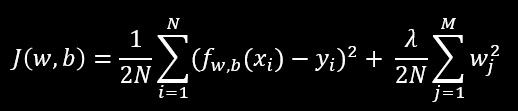

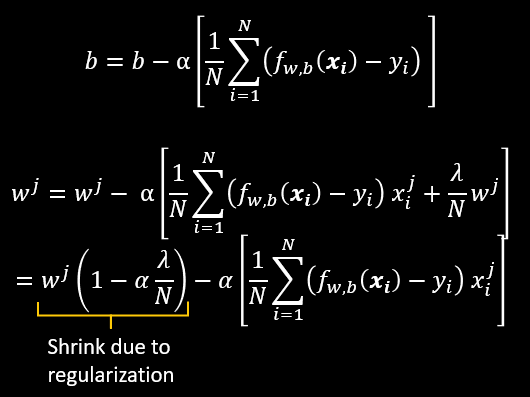

In [23]:
def compute_cost(X, y, w, b, lambda_):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : scalar Values of bias parameter of the model
    Returns:
      cost: (scalar)         cost 
    """

    m, n = X.shape
    
    f=sigmoid(np.dot(X,w)+b)
    cost_pt1=np.sum(np.square(f-y))/2*m
    cost_pt2=np.sum(w)*(lambda_/(2*m))
    cost=cost_pt1+cost_pt2
    


    return cost

In [24]:
def compute_gradient(X,y,w,b, lambda_):
  m, n = X.shape
  #initialize dj_dw and dj_db a zeros
  dj_dw = np.zeros(w.shape)
  dj_db = 0.

  f=sigmoid(np.dot(X,w))
  dj_dw=np.sum(np.dot(X.T,(f-y))+w*(lambda_/m))/m
  dj_db=np.sum((f-y))/m


  return dj_dw, dj_db

In [25]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    # number of training examples
    m = len(X)
    J_history = []

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in =    w_in-(alpha*dj_dw)
        b_in =    b_in-(alpha*dj_db)

        # Save cost J at each iteration
        if i < 100000:
            cost = cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)
            if i % 10 == 0 and i < 100000 - 10:
                print("cost = {}".format(cost))
        

    return w_in, b_in, J_history


# **Using sklearn**

Try using Sklearn to implement logistic regression

In [26]:
df=pd.read_csv('student_score.csv')
df.describe

<bound method NDFrame.describe of      ID      Exam1      Exam2  Status
0     1  34.623660  78.024693       0
1     2  30.286711  43.894998       0
2     3  35.847409  72.902198       0
3     4  60.182599  86.308552       1
4     5  79.032736  75.344376       1
..  ...        ...        ...     ...
95   96  83.489163  48.380286       1
96   97  42.261701  87.103851       1
97   98  99.315009  68.775409       1
98   99  55.340018  64.931938       1
99  100  74.775893  89.529813       1

[100 rows x 4 columns]>

In [27]:
x=df[['Exam1','Exam2']]
y=df['Status']

In [28]:
X_TRAIN,X_TEST,y_TRAIN,y_TEST=train_test_split(x,y,test_size=0.2,random_state=30)
X_TRAIN=np.array(X_TRAIN)
X_TEST=np.array(X_TEST)

In [29]:
model=LogisticRegression()
model.fit(X_TRAIN,y_TRAIN)

LogisticRegression()

In [30]:
model.score(X_TEST,y_TEST)

In [33]:
y_PREDICT=model.predict(X_TEST)

# **Bonus Exercise**

Implement Presision, Recall, and F1 Score to evauate the model either from scratch or by using sklearn.metrics

In [31]:
from sklearn.metrics import precision_score,recall_score, f1_score

In [35]:
print(precision_score(y_TEST,y_PREDICT))
print(recall_score(y_TEST,y_PREDICT))
print(f1_score(y_TEST,y_PREDICT))

0.9230769230769231
1.0
0.9600000000000001


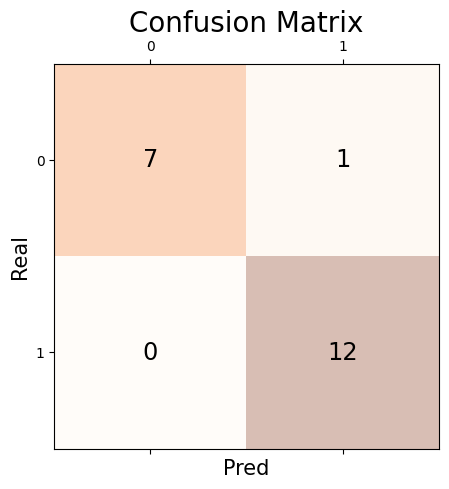

In [34]:
conf_matrix=confusion_matrix(y_true=y_TEST,y_pred=y_PREDICT)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Pred', fontsize=15)
plt.ylabel('Real', fontsize=15)
plt.title('Confusion Matrix', fontsize=20)
plt.show()